In [1]:
%load_ext autoreload
%autoreload 2


from sklearn.ensemble import IsolationForest
from itertools import product, combinations
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Para importar las funciones de mi src
import sys
sys.path.append('src') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp

# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# EDA

## Observaciones:
- No hay nulos
- Tenemos 167 países distintos, esto a la vez indica 167 datos y 10 columnas
- No hay duplicados

In [2]:
df = pd.read_csv('datos/country.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [9]:
f.exploracion_dataframe(df)

El número de datos es 167 y el de columnas es 10

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna country tiene los siguientes valores únicos:


,count
country,
Afghanistan,1
Morocco,1
Myanmar,1
Namibia,1
Nepal,1
...,...
Georgia,1
Germany,1
Ghana,1


## Conocer los países que destacan en las columnas:

<Axes: xlabel='country', ylabel='income'>

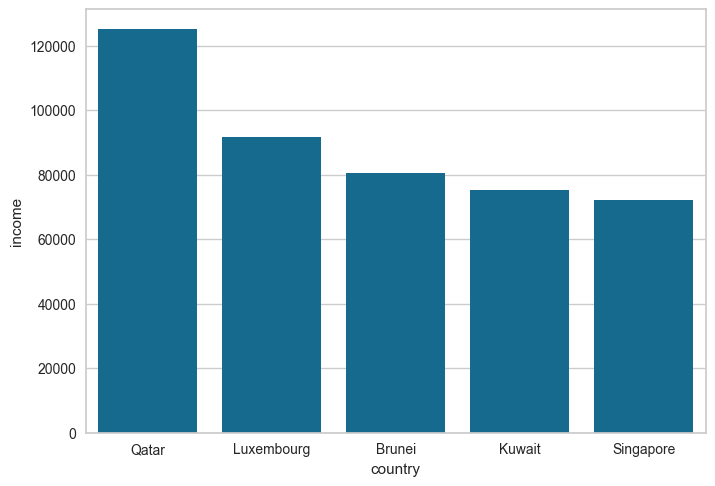

In [10]:
sns.barplot(x='country', y='income', data=df.sort_values(by='income', ascending=False).head(5))


In [11]:
df[['country', 'child_mort']].sort_values(by='child_mort' ,ascending=False).head()

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0


In [12]:
df[['country', 'exports']].sort_values(by='exports' ,ascending=False).head()

,country,exports
133,Singapore,200.0
91,Luxembourg,175.0
98,Malta,153.0
73,Ireland,103.0
131,Seychelles,93.8


## Distribución de mis columnas numéricas

In [13]:
df_num, df_cat = f.separar_dataframes(df)

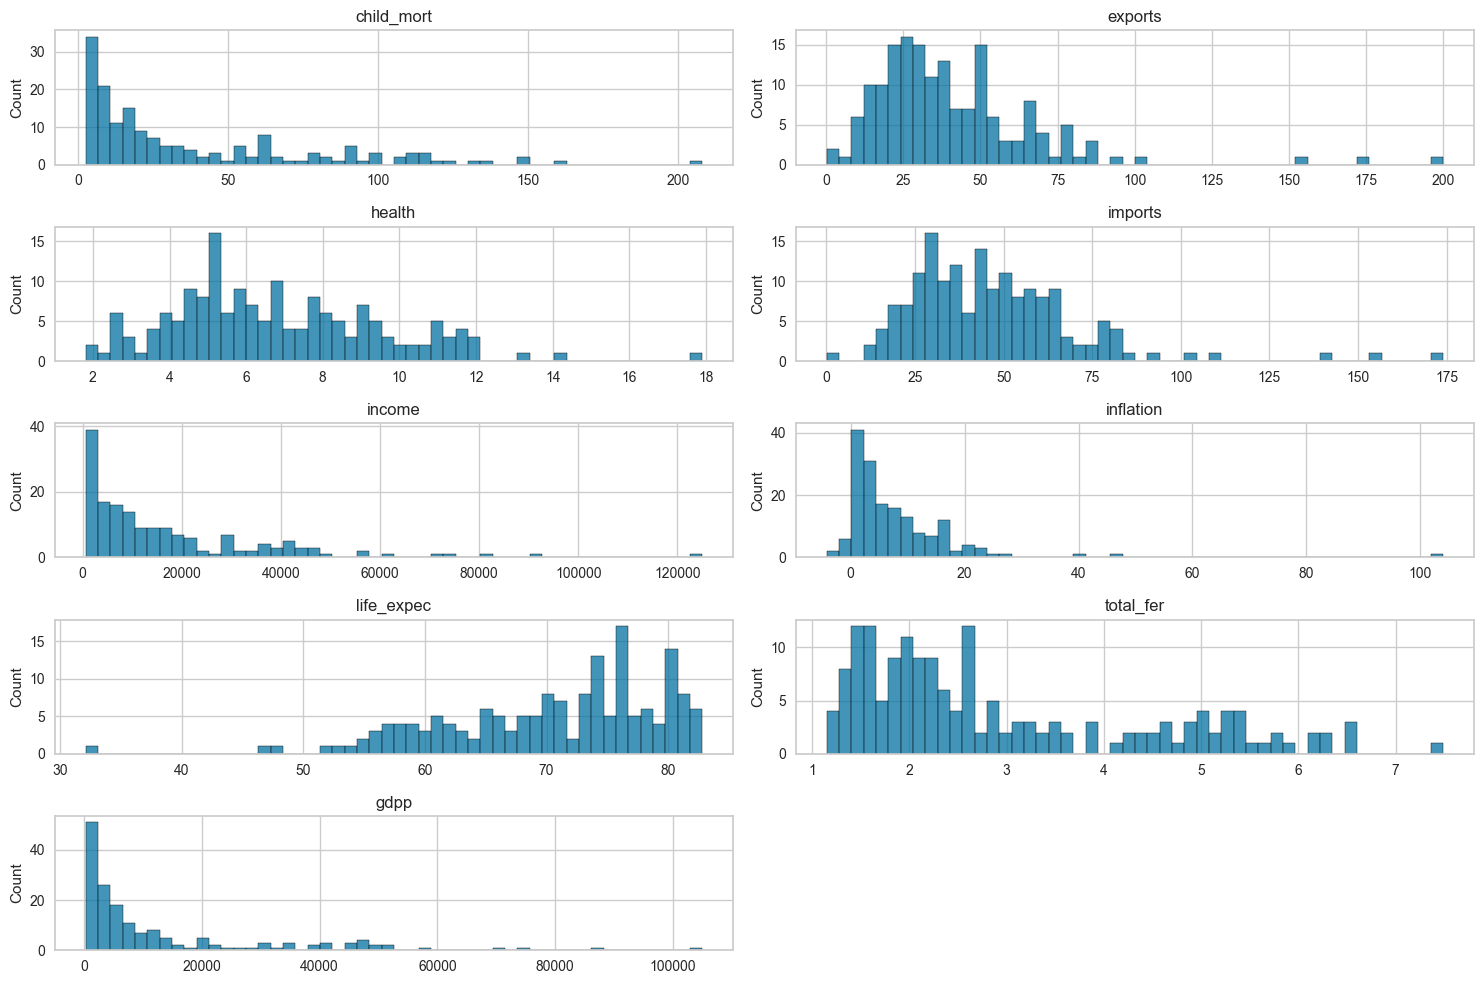

In [14]:
f.plot_numericas(df_num, figsize=(15,10))

No hay distribuciones normales para las columnas numéricas.

## Correlaciones

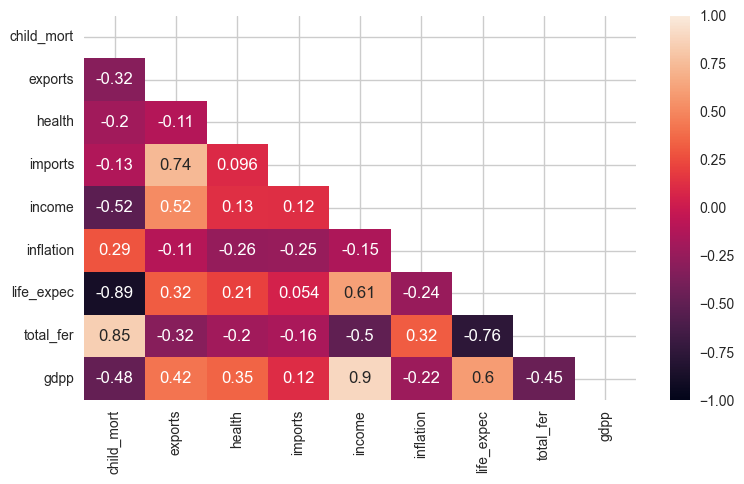

In [15]:
f.matriz_correlacion(df, figsize=(8,5))

Se observan importantes correlaciones positivas y negativas:
(+) total_fer-child_mort, imports-exports, life_expec-income, gdpp-income
(-) life_expec-child_mort, total_fer-life-expec

<Axes: xlabel='life_expec', ylabel='child_mort'>

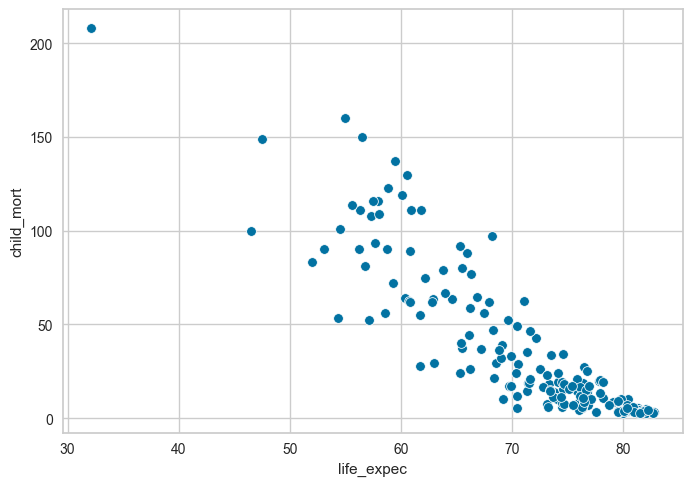

In [16]:
sns.scatterplot(x='life_expec', y='child_mort', data=df)

<Axes: xlabel='gdpp', ylabel='income'>

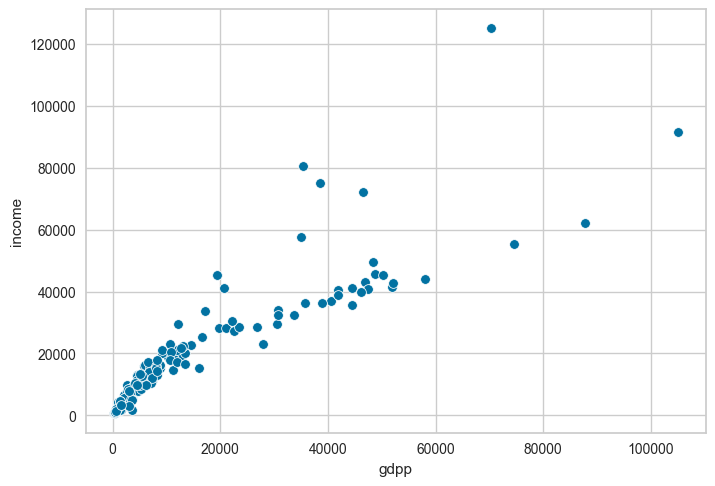

In [17]:
sns.scatterplot(x='gdpp', y='income', data=df)

<Axes: xlabel='imports', ylabel='exports'>

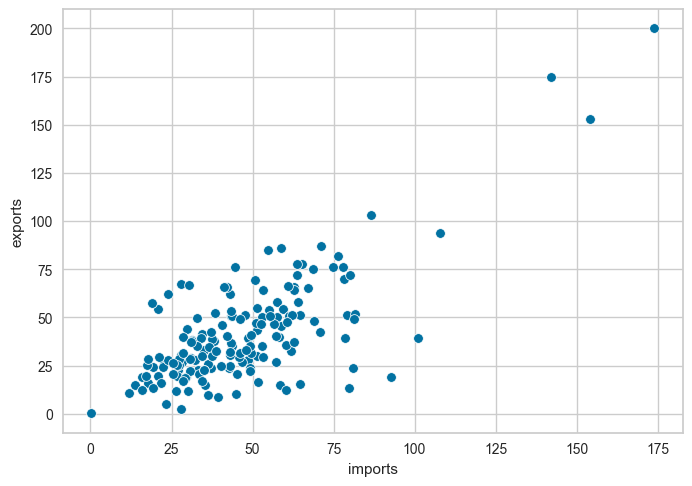

In [18]:
sns.scatterplot(x='imports', y='exports', data=df)

<Axes: xlabel='total_fer', ylabel='child_mort'>

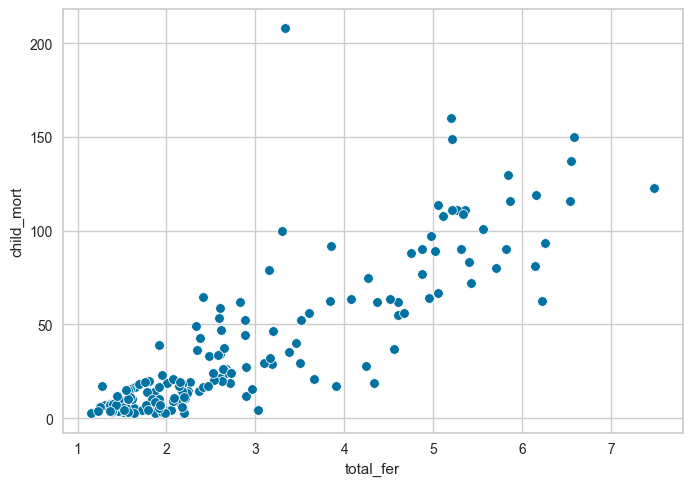

In [19]:
sns.scatterplot(x='total_fer', y='child_mort', data=df)

In [20]:
visuales= spp.Visualizador(df) #invoco mi clase de visualizador

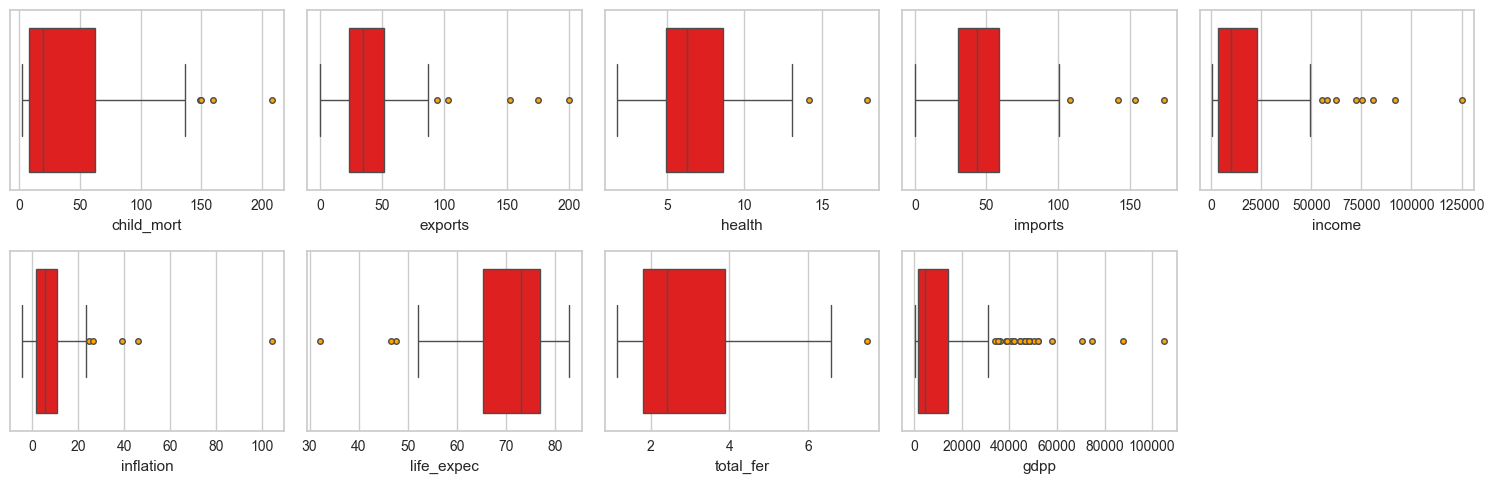

In [21]:
visuales.deteccion_outliers(color='red')

In [22]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Se pueden ver outliers univariados en todas las columnas obtenidas de nuestro dataframe.

In [23]:
lista_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # saco mis columnas numéricas

## Estandarización

In [24]:
df_copia = df.copy()

In [25]:
# df_estandar = f.escalar_columnas(df, lista_num) # aqui meto las estandarizaciones a mis columnas numericas

In [26]:
# f.visualizar_escalados_completos(df_estandar, lista_num)

## Método directo

In [27]:
df_escalado = f.escalar_columnas_metodo(df_copia,lista_num,'stand')

In [28]:
df_escalado

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## Outliers multivariados

Considerando el origen de los datos, no es conveniente cargarse aquellos que sean identificados como outliers. Esto debido a que son métricas a nivel internacional, donde que un país destaque por encima de otro (por lo bueno o por lo malo) solo es un reflejo de su realidad.

In [29]:
# contaminacion = [0.01, 0.05, 0.1]
# estimadores = [10, 50, 100]

# combinaciones = list(product(contaminacion, estimadores))
# combinaciones

In [30]:
# for cont, esti in combinaciones:
#     ifo = IsolationForest(random_state=42, #semilla de datos aleatorios
#                         n_estimators=esti, #numero de arboles
#                         contamination=cont,
#                         n_jobs=-1) #nucleos del ordenador

#     df[f'outliers_ifo_{cont}_{esti}'] = ifo.fit_predict(df[[lista_num]])

In [31]:
# columnas_hue = df.filter(like='outlier').columns # se queda con todas las columnas de out

In [32]:
# columnas_hue

In [33]:
# combinaciones_viz = list(combinations([lista_num], 2)) # hago combinaciones de 2
# combinaciones_viz
# for outlier in columnas_hue:
#     fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

#     for indice, tupla in enumerate(combinaciones_viz):
#         sns.scatterplot(x=tupla[0],
#                         y=tupla[1], 
#                         ax=axes[indice],
#                         data=df,
#                         style=outlier,
#                         size=2,
#                         hue=outlier, #aqui miro todos mis graficos para ver cual me muestra los mejores OUTL
#                         palette='Set1')
        
#     plt.title(f'{outlier}')

Modelos

In [34]:
df_escalado.set_index('country', inplace=True)

In [35]:
df_escalado

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754


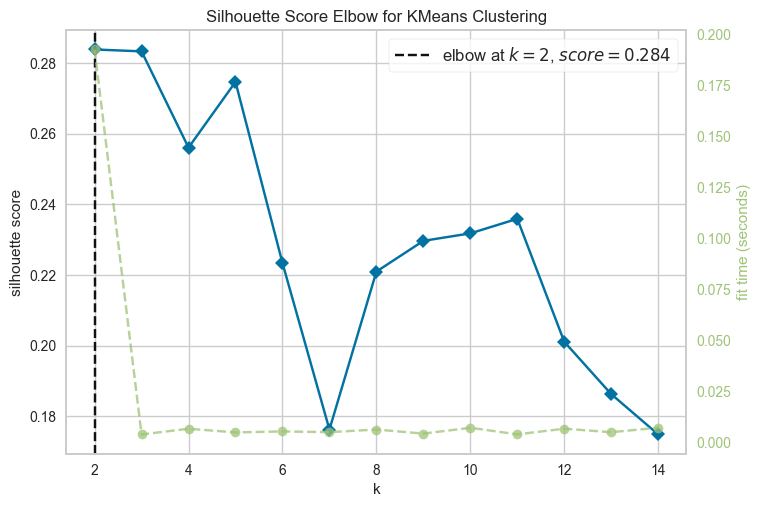

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [36]:
model = KMeans()
visualizador = KElbowVisualizer(model, k=(2,15), metric='silhouette')
visualizador.fit(df_escalado)
visualizador.show()

Ya tengo el numero de kluster y mi silhoutte

In [37]:
modelo_kmeans = KMeans(n_clusters=2, random_state=42)
km_fit =modelo_kmeans.fit(df_escalado)
km_fit.labels_
df_kmeans = df_escalado.copy()
df_kmeans['cluster'] = km_fit.labels_
df_kmeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1


Me dice a que grupo pertenece cada país

In [38]:
columnas_plot =df_kmeans.columns.drop('cluster')
columnas_plot

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

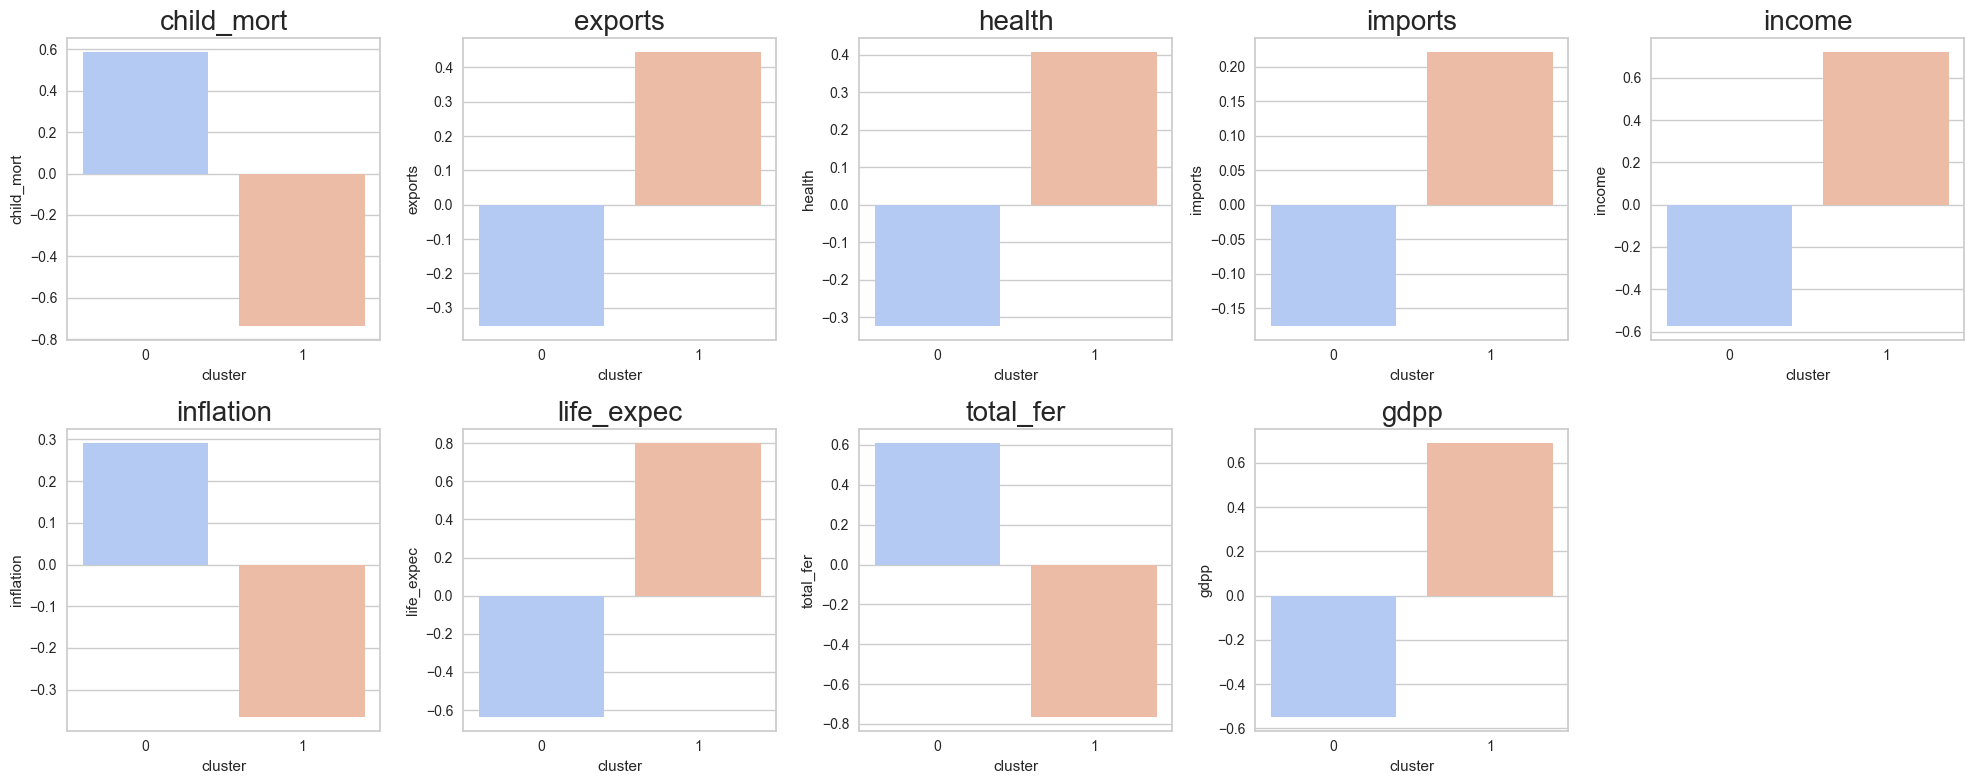

In [39]:
fig,axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) /2), figsize= (20,8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df_kmeans.groupby('cluster')[columna].mean().reset_index()
    sns.barplot(x='cluster', y=columna, data=df_group, ax=axes[indice], palette='coolwarm')
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()
fig.delaxes(axes[-1])

In [40]:
df_kmeans.reset_index(inplace=True)

In [41]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [45]:
df_kmeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


In [46]:
# vamos a generar un mapa, para poder entender mejor los clusters y poder sacar conclusiones
fig = px.choropleth(df_kmeans,
                    locationmode = 'country names', # las ubicaciones se especifican por nombres de países.
                    locations = 'country', # la columna en df que contiene los nombres de los países.
                    color = df_kmeans['cluster'], # define el color de cada país según el cluster al que pertenece, usando la columna 'clusters' del DataFrame df.
                    color_discrete_map = { 1: "Green", # mapea los valores posibles de la columna 'clusters' a colores discretos en el mapa. 
                                          0: "Red"}      )

# ocultamos los detalles geográficos como fronteras y nombres de países
fig.update_geos(visible=False)

# configuramos la leyenda
fig.update_layout(legend_title_text = 'Cluster', # título de la leyenda que muestra los colores y sus correspondientes etiquetas de cluster.
                  legend_title_side = 'top') # posición de la leyenda

# ajustamos los márgenes del diseño del mapa para eliminar cualquier espacio adicional alrededor del gráfico.
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# mostramos el mapa
fig.show()

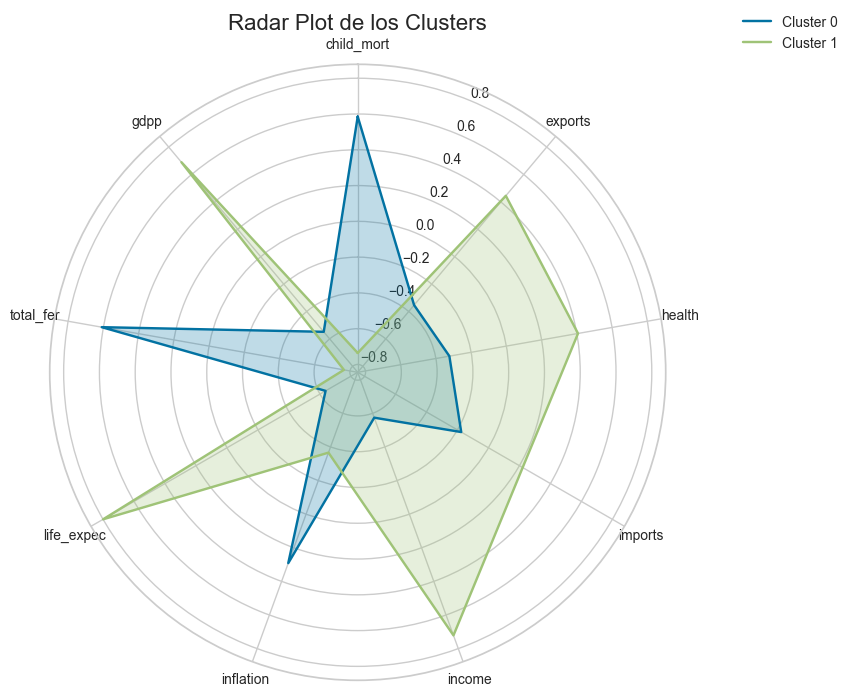

In [44]:
# Supongamos que 'df' es tu DataFrame
# Variables que deseas incluir en el radar plot
variables = ['child_mort', 'exports', 'health', 'imports', 'income', 
             'inflation', 'life_expec', 'total_fer', 'gdpp']

# Agrupar por cluster y calcular la media
cluster_means = df_kmeans.groupby('cluster')[variables].mean()

# Repetir la primera columna al final para cerrar el radar
cluster_means = pd.concat([cluster_means, cluster_means.iloc[:, 0:1]], axis=1)

# Crear los ángulos para el radar plot
num_vars = len(variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Crear el radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar un gráfico para cada cluster
for i, row in cluster_means.iterrows():
    ax.plot(angles, row, label=f'Cluster {i}')
    ax.fill(angles, row, alpha=0.25)

# Configurar etiquetas de los ejes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Plot de los Clusters', size=16)
plt.show()

## Métodos Aglomerativos

Le paso el df sin la columna kmeans

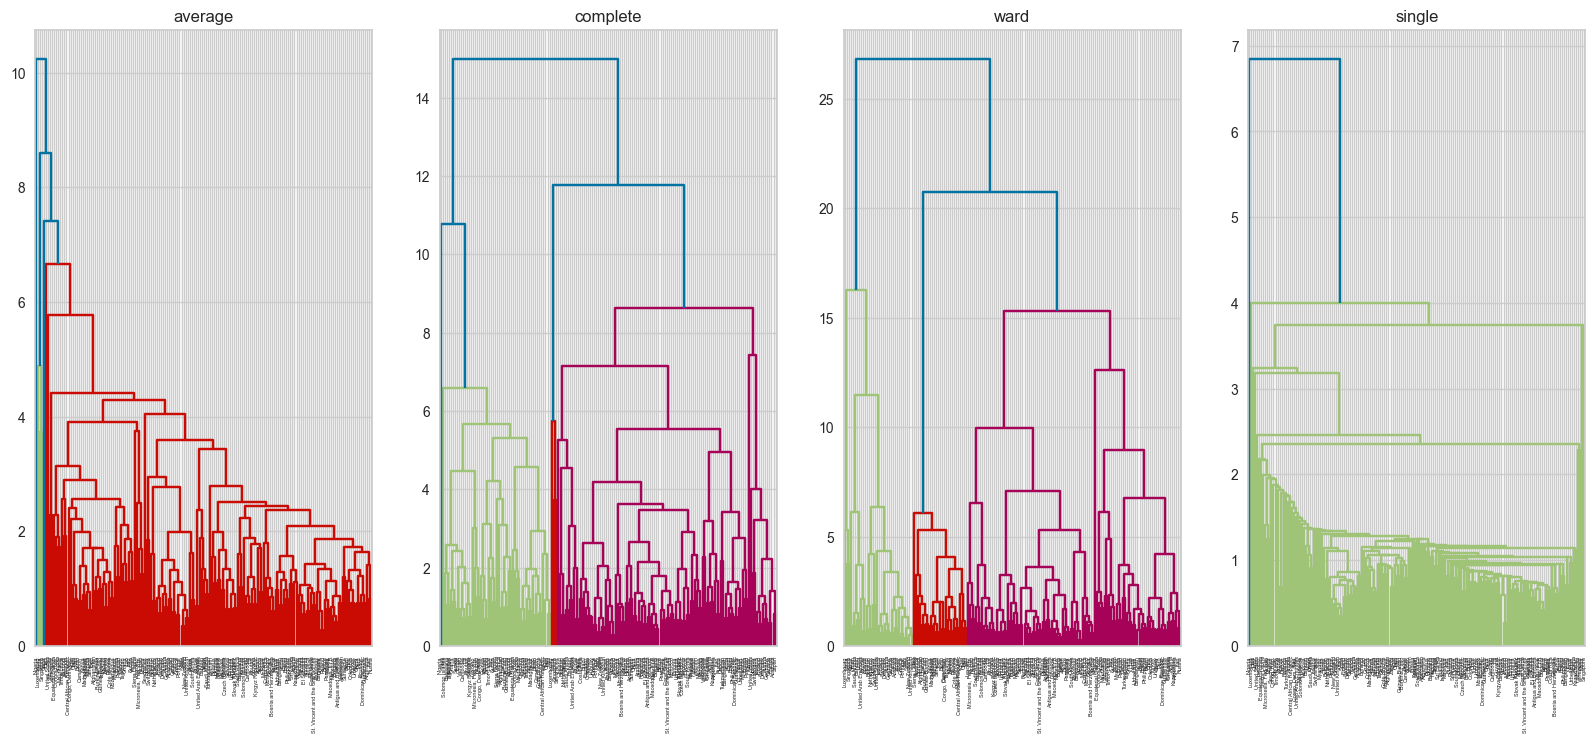

In [81]:
lista_metodos = ['average', 'complete', 'ward', 'single']

fig, axes = plt.subplots(nrows=1, ncols=len(lista_metodos), figsize=(20,8))
axes = axes.flat

for indice, metodo in enumerate(lista_metodos):
    sch.dendrogram(sch.linkage(df_escalado, method=metodo),
                   labels=df_escalado.index,
                   leaf_rotation=90,
                   leaf_font_size=4,
                   ax=axes[indice])
    axes[indice].set_title(metodo)

In [48]:
df_escalado.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [50]:
df_prueba = df_escalado.copy()

In [51]:
# Configuraciones de vinculación y métricas de distancia
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'chebyshev']

# Crear un DataFrame para almacenar los resultados
results = []

# Suponiendo que tienes un DataFrame llamado df_copia
# Aquí df_copia debería ser tu conjunto de datos
# Asegúrate de que esté preprocesado adecuadamente (normalizado si es necesario)

for linkage_method in linkage_methods:
    for metric in distance_metrics:
        for cluster in range(3,6):
            try:
                # Configurar el modelo de AgglomerativeClustering
                modelo = AgglomerativeClustering(
                    linkage=linkage_method,
                    metric=metric,  # o affinity si da error
                    distance_threshold=None,  # Para buscar n_clusters
                    n_clusters=cluster, # Cambia esto según tu análisis
                )
                
                # Ajustar el modelo
                labels = modelo.fit_predict(df_prueba)

                # Calcular métricas si hay más de un cluster
                if len(np.unique(labels)) > 1:
                    # Silhouette Score
                    silhouette_avg = silhouette_score(df_prueba, labels, metric=metric)

                    # Davies-Bouldin Index
                    db_score = davies_bouldin_score(df_prueba, labels)

                    
                    # Cardinalidad (tamaño de cada cluster)
                    cluster_cardinality = {cluster: sum(labels == cluster) for cluster in np.unique(labels)}
                else:
                    cluster_cardinality = {'Cluster único': len(df_prueba)}

                # Almacenar resultados
                results.append({
                    'linkage': linkage_method,
                    'metric': metric,
                    'silhouette_score': silhouette_avg,
                    'davies_bouldin_index': db_score,
                    'cluster_cardinality': cluster_cardinality,
                    'n_cluster': cluster
                })

            except Exception as e:
                print(f"Error con linkage={linkage_method}, metric={metric}: {e}") # ward solo funciona con euclidiana

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados ordenados por silhouette_score
results_df = results_df.sort_values(by='silhouette_score', ascending=False)

# Mostrar el DataFrame
results_df.head(20)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
0,single,euclidean,0.568913,0.273708,"{0: 165, 1: 1, 2: 1}",3
18,average,euclidean,0.562047,0.513394,"{0: 163, 1: 1, 2: 3}",3
6,single,chebyshev,0.559379,0.273708,"{0: 165, 1: 1, 2: 1}",3
7,single,chebyshev,0.547080,0.314856,"{0: 164, 1: 1, 2: 1, 3: 1}",4
8,single,chebyshev,0.545759,0.302841,"{0: 163, 1: 1, 2: 1, 3: 1, 4: 1}",5
1,single,euclidean,0.534772,0.452466,"{0: 2, 1: 163, 2: 1, 3: 1}",4
24,average,chebyshev,0.517048,0.640772,"{0: 4, 1: 1, 2: 162}",3
19,average,euclidean,0.496960,0.469682,"{0: 162, 1: 1, 2: 3, 3: 1}",4
15,complete,chebyshev,0.496657,0.943767,"{0: 7, 1: 1, 2: 159}",3
25,average,chebyshev,0.489070,0.588592,"{0: 162, 1: 1, 2: 3, 3: 1}",4


In [54]:
df_datos = pd.read_csv('datos/datos.csv', index_col = 0)

In [55]:
df_datos.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [60]:
# Crear un DataFrame para almacenar los resultados
results = []

# Suponiendo que tienes un DataFrame llamado df_copia
# Aquí df_copia debería ser tu conjunto de datos
# Asegúrate de que esté preprocesado adecuadamente (normalizado si es necesario)

for cluster in range(3,6):
    try:
        # Configurar el modelo de AgglomerativeClustering
        modelo = AgglomerativeClustering(
            linkage='ward',
            metric='euclidean',  # o affinity si da error
            distance_threshold=None,  # Para buscar n_clusters
            n_clusters=cluster, # Cambia esto según tu análisis
        )
        
        # Ajustar el modelo
        labels_datos = modelo.fit_predict(df_datos)

        # Calcular métricas si hay más de un cluster
        if len(np.unique(labels_datos)) > 1:
            # Silhouette Score
            silhouette_avg = silhouette_score(df_datos, labels_datos, metric=metric)

            # Davies-Bouldin Index
            db_score = davies_bouldin_score(df_datos, labels_datos)

            
            # Cardinalidad (tamaño de cada cluster)
            cluster_cardinality = {cluster: sum(labels_datos == cluster) for cluster in np.unique(labels_datos)}
        else:
            cluster_cardinality = {'Cluster único': len(df_datos)}

        # Almacenar resultados
        results.append({
            'linkage': linkage_method,
            'metric': metric,
            'silhouette_score': silhouette_avg,
            'davies_bouldin_index': db_score,
            'cluster_cardinality': cluster_cardinality,
            'n_cluster': cluster
        })

    except Exception as e:
        print(f"Error con linkage={linkage_method}, metric={metric}: {e}") # ward solo funciona con euclidiana

# Crear DataFrame de resultados
results_df_datos = pd.DataFrame(results)

# Mostrar resultados ordenados por silhouette_score
results_df_datos = results_df_datos.sort_values(by='silhouette_score', ascending=False)

# Mostrar el DataFrame
results_df_datos.head(20)

,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
1,ward,euclidean,0.248119,1.080126,"{0: 106, 1: 31, 2: 27, 3: 3}",4
0,ward,euclidean,0.245630,1.299789,"{0: 34, 1: 106, 2: 27}",3
2,ward,euclidean,0.219330,1.300801,"{0: 43, 1: 31, 2: 27, 3: 3, 4: 63}",5


In [61]:
labels

array([2, 4, 0, 0, 4, 0, 4, 1, 1, 4, 4, 1, 0, 4, 4, 1, 4, 2, 4, 0, 4, 4,
       0, 1, 4, 2, 2, 4, 2, 1, 4, 2, 2, 0, 0, 0, 2, 2, 0, 4, 2, 4, 4, 4,
       1, 0, 0, 0, 4, 0, 0, 4, 4, 1, 1, 0, 2, 4, 1, 0, 1, 4, 0, 2, 2, 4,
       2, 4, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 0, 2, 4, 1, 4, 0, 4, 4, 4,
       4, 1, 4, 3, 4, 2, 2, 4, 4, 2, 3, 0, 4, 4, 4, 0, 4, 4, 2, 0, 4, 0,
       1, 1, 2, 0, 1, 1, 0, 4, 4, 0, 0, 4, 1, 1, 4, 0, 2, 4, 1, 2, 4, 4,
       2, 3, 4, 4, 4, 4, 4, 1, 0, 4, 0, 4, 1, 1, 0, 2, 4, 0, 2, 4, 4, 0,
       0, 2, 4, 1, 1, 1, 0, 0, 4, 0, 4, 0, 2], dtype=int64)

In [62]:
df_aglomerativo = df_datos.copy()

In [63]:
df_aglomerativo['cluster'] = labels

In [65]:
df_aglomerativo.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,4
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,4


## Comparar clusters

In [72]:
df_aglomerativo['cluster'].value_counts()

cluster
4    63
0    43
1    31
2    27
3     3
Name: count, dtype: int64

In [79]:
df_aglomerativo[df_aglomerativo['cluster'] == 4].sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Belize,-0.484233,0.625362,-0.589969,0.439565,-0.482027,-0.630214,0.095225,-0.157664,-0.471942,4
Romania,-0.665789,-0.311344,-0.451212,-0.335179,0.034095,-0.403438,0.354628,-0.899726,-0.259069,4
Tunisia,-0.519052,0.343618,-0.221167,0.348419,-0.350916,-0.375921,0.715537,-0.535321,-0.482887,4
Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949,4
Lebanon,-0.695634,-0.194256,0.078256,0.551427,-0.043948,-0.715801,1.042610,-0.886475,-0.224593,4
Belarus,-0.815013,0.376549,-0.440257,0.729576,-0.049151,0.694389,-0.017559,-0.965982,-0.379460,4
Barbados,-0.598639,-0.058873,0.421497,0.074980,-0.095976,-0.707926,0.692980,-0.773841,0.166131,4
Cyprus,-0.862268,0.332641,-0.308803,0.439565,0.871752,-0.547664,1.053889,-1.012361,0.976037,4
Kiribati,0.607589,-1.017533,1.637446,1.367601,-0.802002,-0.594158,-1.111564,0.591023,-0.627904,4


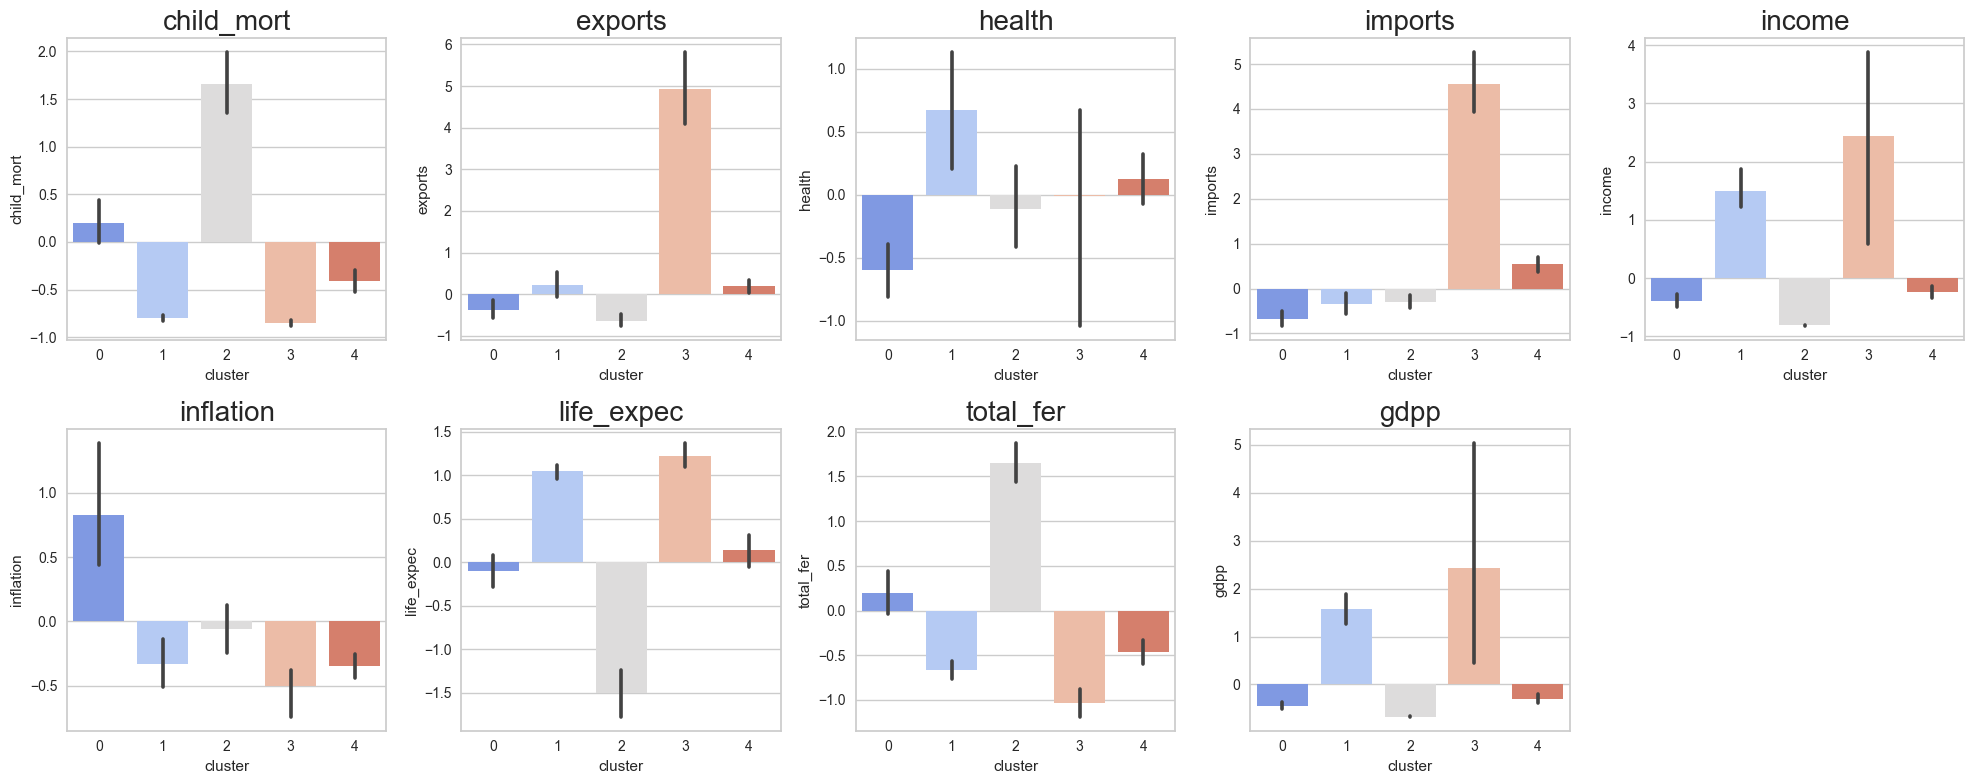

In [66]:
fig,axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) /2), figsize= (20,8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df_aglomerativo.groupby('cluster')[columna].mean().reset_index()
    sns.barplot(x='cluster', y=columna, data=df_aglomerativo, ax=axes[indice], palette='coolwarm')
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()
fig.delaxes(axes[-1])

In [69]:
# vamos a generar un mapa, para poder entender mejor los clusters y poder sacar conclusiones
fig = px.choropleth(df_kmeans,
                    locationmode = 'country names', # las ubicaciones se especifican por nombres de países.
                    locations = 'country', # la columna en df que contiene los nombres de los países.
                    color = df_aglomerativo['cluster'], # define el color de cada país según el cluster al que pertenece, usando la columna 'clusters' del DataFrame df.
                    color_discrete_map = { '0': "Green", # mapea los valores posibles de la columna 'clusters' a colores discretos en el mapa. 
                                          1: "Red",
                                          2: 'Blue',
                                          3: 'Yellow', 
                                          4: 'Orange'})

# ocultamos los detalles geográficos como fronteras y nombres de países
fig.update_geos(visible=False)

# configuramos la leyenda
fig.update_layout(legend_title_text = 'Cluster', # título de la leyenda que muestra los colores y sus correspondientes etiquetas de cluster.
                  legend_title_side = 'top') # posición de la leyenda

# ajustamos los márgenes del diseño del mapa para eliminar cualquier espacio adicional alrededor del gráfico.
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# mostramos el mapa
fig.show()